<h1>Importuri</h1>

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import os
import networkx as nx
import matplotlib.colors as mcolors
import random
warnings.simplefilter('ignore')

<h1>Cod Evolutiv</h1>

In [15]:
class GA:
    def __init__(self, popSize, mutation_chance, geneSize, killRate, graph, noCommunities):
        self.popSize = popSize
        self.mutation_chance = mutation_chance
        self.geneSize = geneSize
        self.killRate = killRate
        self.graph = graph
        self.noCommunities = noCommunities
        self.population = []

        for i in range(popSize):
            gene = []
            for i in range(self.geneSize):
                gene.append(round(random.uniform(0,noCommunities-1)))
            self.population.append(gene)

    def population(self):
        return self.population
        
    def popSize(self):
        return self.popSize

    def combine(self, index_mother, index_father):
        mother = self.population[index_mother]
        #cei mai buni din primii cativa
        mother = [mother[:len(mother)//2],mother[len(mother)//2:]]
        
        father = self.population[index_father]
        father = [father[:len(father)//2],father[len(father)//2:]]
        
        childA=mother[0] + father[1]
        childB=father[0] + mother[1]

        if random.random() < self.mutation_chance:
            self.mutate(childA)
        if random.random() < self.mutation_chance:
            self.mutate(childB)
        
        self.population.append(childA)
        if len(self.population) < self.popSize:
            self.population.append(childB)

    def mutate(self,entity):
        gene = round(random.uniform(-self.geneSize+1,self.geneSize-1))
        if gene > 0 and entity[gene] < self.noCommunities-1:
            entity[gene] += 1
        elif gene < 0:
            gene = -gene
            if entity[gene] > 0:
                entity[-gene] -= 1
        # elif gene < 0 and entity[-gene] > 0:
        #     entity[-gene] -= 1

    def purge(self):
        self.population = sorted(self.population, key=lambda x: self.fitness(self.graph, x))
        self.population = self.population[self.popSize-round(self.popSize*self.killRate):]

    def findBest(self):
        return sorted(self.population, key=lambda x: self.fitness(self.graph, x))[0]

    #din gene in comunitati
    def convert(self, nodes, community_indices):
        ret = [[] for _ in range(max(community_indices) + 1)]
        node_list = list(nodes)
        for i in range(len(community_indices)):
            ret[community_indices[i]].append(node_list[i]) 
        return ret

    # modularity
    # def fitness(self,G, communities):
    #     communities2 = self.convert(G.nodes,communities)
    #     return nx.community.modularity(G,communities2)

    #coverage
    def fitness(self, G, communities):
        node_labels = list(G.nodes)
        num_intra_community_edges = sum(G.has_edge(i, j) for i, j in G.edges() if communities[node_labels.index(i)] == communities[node_labels.index(j)])
        total_edges = G.number_of_edges()
        coverage = num_intra_community_edges / total_edges
        return coverage

    def train(self, noEpochs):
        for epoch in range(noEpochs):
            print('Epoch ', epoch+1, '/', noEpochs)
            print('Best score: ', self.fitness(self.graph,self.findBest()))
            #print('Best score: ', self.findBest())
            self.purge()
            while len(self.population) < self.popSize:
                size = len(self.population)
                self.combine(round(random.uniform(0,size)-1),round(random.uniform(0,size))-1) 

def drawGraph(G, communities):
    pos = nx.spring_layout(G)  # compute graph layout
    my_cmap = mcolors.ListedColormap(['red', 'green', 'blue','purple','pink','yellow'])
    plt.figure(figsize=(10, 10)) 
    nx.draw_networkx_nodes(G, pos, node_size=150, cmap=my_cmap, node_color = communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)

def convert(nodes, community_indices):
        ret = [[] for _ in range(max(community_indices) + 1)]
        node_list = list(nodes)
        for i in range(len(community_indices))
        return ret

In [17]:
def drawGraph(G, communities):
    pos = nx.spring_layout(G)  # compute graph layout
    my_cmap = mcolors.ListedColormap(['red', 'green', 'blue','purple','pink','yellow'])
    plt.figure(figsize=(10, 10)) 
    nx.draw_networkx_nodes(G, pos, node_size=150, cmap=my_cmap, node_color = communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)


<h1>Delfini</h1>

Epoch  1 / 50
Best score:  0.41509433962264153
Epoch  2 / 50
Best score:  0.44654088050314467
Epoch  3 / 50
Best score:  0.4276729559748428
Epoch  4 / 50
Best score:  0.4528301886792453
Epoch  5 / 50
Best score:  0.44654088050314467
Epoch  6 / 50
Best score:  0.49056603773584906
Epoch  7 / 50
Best score:  0.48427672955974843
Epoch  8 / 50
Best score:  0.4968553459119497
Epoch  9 / 50
Best score:  0.4968553459119497
Epoch  10 / 50
Best score:  0.49056603773584906
Epoch  11 / 50
Best score:  0.4716981132075472
Epoch  12 / 50
Best score:  0.4968553459119497
Epoch  13 / 50
Best score:  0.4968553459119497
Epoch  14 / 50
Best score:  0.4968553459119497
Epoch  15 / 50
Best score:  0.4968553459119497
Epoch  16 / 50
Best score:  0.4968553459119497
Epoch  17 / 50
Best score:  0.4968553459119497
Epoch  18 / 50
Best score:  0.5283018867924528
Epoch  19 / 50
Best score:  0.5283018867924528
Epoch  20 / 50
Best score:  0.5094339622641509
Epoch  21 / 50
Best score:  0.5283018867924528
Epoch  22 / 50
B

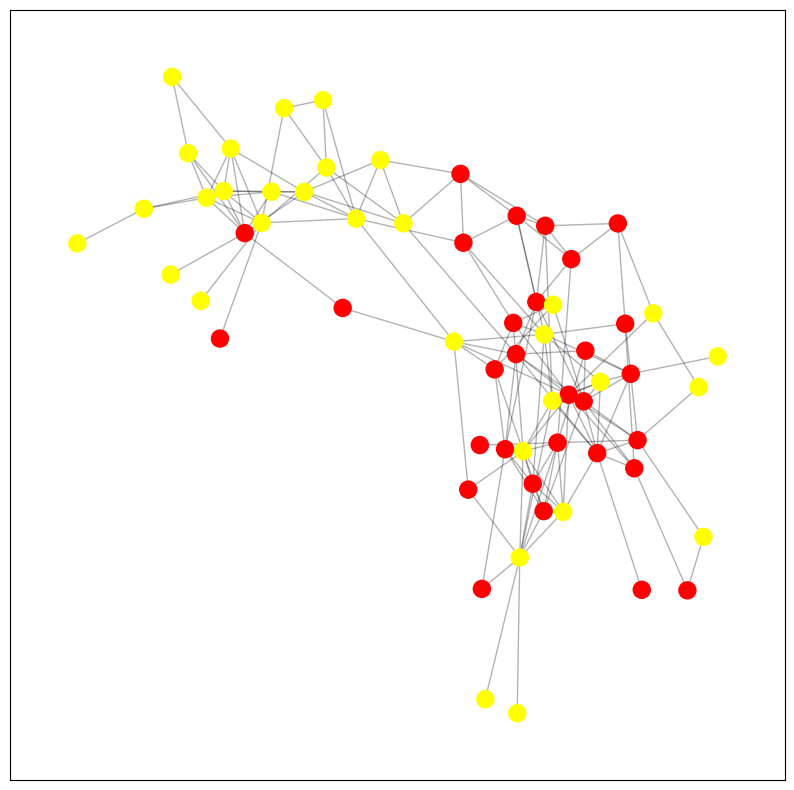

[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
[[1, 3, 9, 11, 13, 15, 16, 19, 24, 25, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 48, 50, 53, 56, 58, 60], [2, 4, 5, 6, 7, 8, 10, 12, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 33, 37, 42, 46, 47, 49, 51, 52, 54, 55, 57, 59, 61, 62]]


In [19]:
crtDir =  os.getcwd()
filePath = 'D:/FACULTATE/SEM4/AI/Lab10/real/dolphins/dolphins.gml'
G = nx.read_gml(filePath)
G = nx.Graph(G)

ga = GA(popSize=200, mutation_chance=0.01, geneSize=G.number_of_nodes(), killRate=0.5, graph=G, noCommunities=2)
ga.train(50)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Football</h1>

Epoch  1 / 100
Best score:  0.05546492659053834
Epoch  2 / 100
Best score:  0.06035889070146819
Epoch  3 / 100
Best score:  0.057096247960848286
Epoch  4 / 100
Best score:  0.06851549755301795
Epoch  5 / 100
Best score:  0.06688417618270799
Epoch  6 / 100
Best score:  0.06851549755301795
Epoch  7 / 100
Best score:  0.07177814029363784
Epoch  8 / 100
Best score:  0.0636215334420881
Epoch  9 / 100
Best score:  0.0799347471451876
Epoch  10 / 100
Best score:  0.07830342577487764
Epoch  11 / 100
Best score:  0.0766721044045677
Epoch  12 / 100
Best score:  0.07830342577487764
Epoch  13 / 100
Best score:  0.07504078303425775
Epoch  14 / 100
Best score:  0.08319738988580751
Epoch  15 / 100
Best score:  0.0799347471451876
Epoch  16 / 100
Best score:  0.08156606851549755
Epoch  17 / 100
Best score:  0.08482871125611746
Epoch  18 / 100
Best score:  0.0799347471451876
Epoch  19 / 100
Best score:  0.08156606851549755
Epoch  20 / 100
Best score:  0.08482871125611746
Epoch  21 / 100
Best score:  0.08

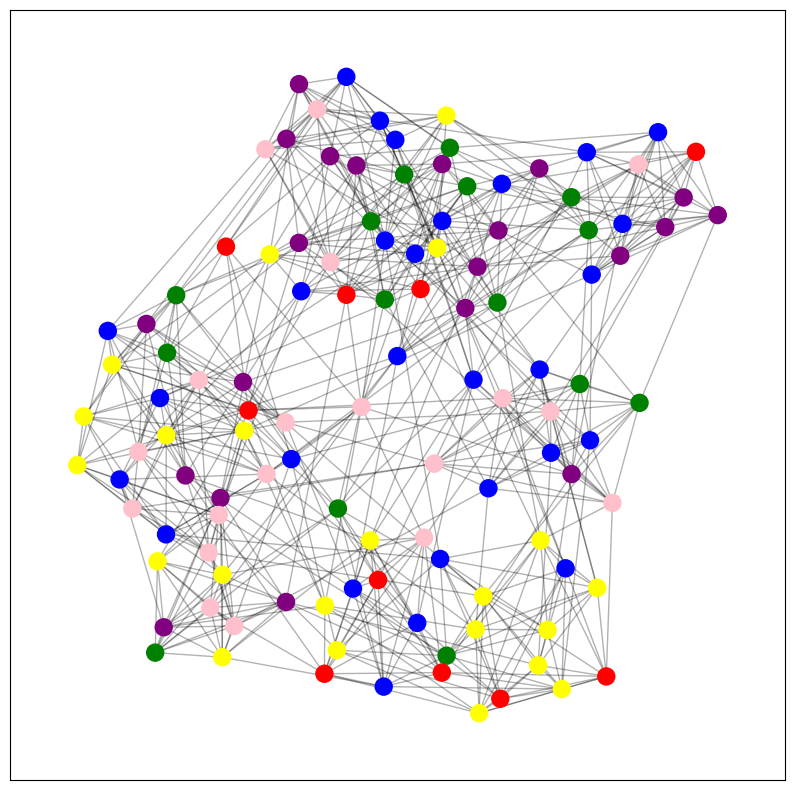

[5, 10, 5, 4, 4, 4, 7, 4, 4, 2, 4, 6, 10, 5, 10, 9, 2, 9, 10, 1, 10, 4, 7, 3, 11, 7, 4, 4, 1, 0, 10, 10, 5, 8, 1, 5, 11, 7, 11, 9, 10, 7, 10, 3, 6, 8, 7, 2, 3, 3, 7, 7, 7, 7, 1, 1, 8, 9, 8, 0, 9, 10, 8, 4, 3, 10, 10, 2, 7, 5, 8, 5, 10, 6, 2, 5, 10, 4, 8, 5, 3, 4, 5, 7, 7, 10, 3, 9, 1, 6, 3, 6, 9, 6, 5, 5, 10, 0, 8, 10, 4, 8, 9, 10, 5, 3, 8, 8, 1, 11, 2, 7, 6, 5, 4]
[[30, 60, 98], [20, 29, 35, 55, 56, 89, 109], [10, 17, 48, 68, 75, 111], [24, 44, 49, 50, 65, 81, 87, 91, 106], [4, 5, 6, 8, 9, 11, 22, 27, 28, 64, 78, 82, 101, 115], [1, 3, 14, 33, 36, 70, 72, 76, 80, 83, 95, 96, 105, 114], [12, 45, 74, 90, 92, 94, 113], [7, 23, 26, 38, 42, 47, 51, 52, 53, 54, 69, 84, 85, 112], [34, 46, 57, 59, 63, 71, 79, 99, 102, 107, 108], [16, 18, 40, 58, 61, 88, 93, 103], [2, 13, 15, 19, 21, 31, 32, 41, 43, 62, 66, 67, 73, 77, 86, 97, 100, 104], [25, 37, 39, 110]]


In [20]:
crtDir =  os.getcwd()
filePath = 'D:/FACULTATE/SEM4/AI/Lab10/real/football/football.gml'
G = nx.read_gml(filePath)
G = nx.Graph(G)

ga = GA(popSize=500, mutation_chance=0.05, geneSize=G.number_of_nodes(), killRate=0.8, graph=G, noCommunities=12)
ga.train(100)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Karate</h1>

Epoch  1 / 50
Best score:  0.3333333333333333
Epoch  2 / 50
Best score:  0.41025641025641024
Epoch  3 / 50
Best score:  0.4358974358974359
Epoch  4 / 50
Best score:  0.4230769230769231
Epoch  5 / 50
Best score:  0.4230769230769231
Epoch  6 / 50
Best score:  0.4230769230769231
Epoch  7 / 50
Best score:  0.3974358974358974
Epoch  8 / 50
Best score:  0.44871794871794873
Epoch  9 / 50
Best score:  0.41025641025641024
Epoch  10 / 50
Best score:  0.47435897435897434
Epoch  11 / 50
Best score:  0.46153846153846156
Epoch  12 / 50
Best score:  0.5
Epoch  13 / 50
Best score:  0.47435897435897434
Epoch  14 / 50
Best score:  0.46153846153846156
Epoch  15 / 50
Best score:  0.48717948717948717
Epoch  16 / 50
Best score:  0.5384615384615384
Epoch  17 / 50
Best score:  0.5
Epoch  18 / 50
Best score:  0.5
Epoch  19 / 50
Best score:  0.5384615384615384
Epoch  20 / 50
Best score:  0.5128205128205128
Epoch  21 / 50
Best score:  0.5512820512820513
Epoch  22 / 50
Best score:  0.5128205128205128
Epoch  23 / 

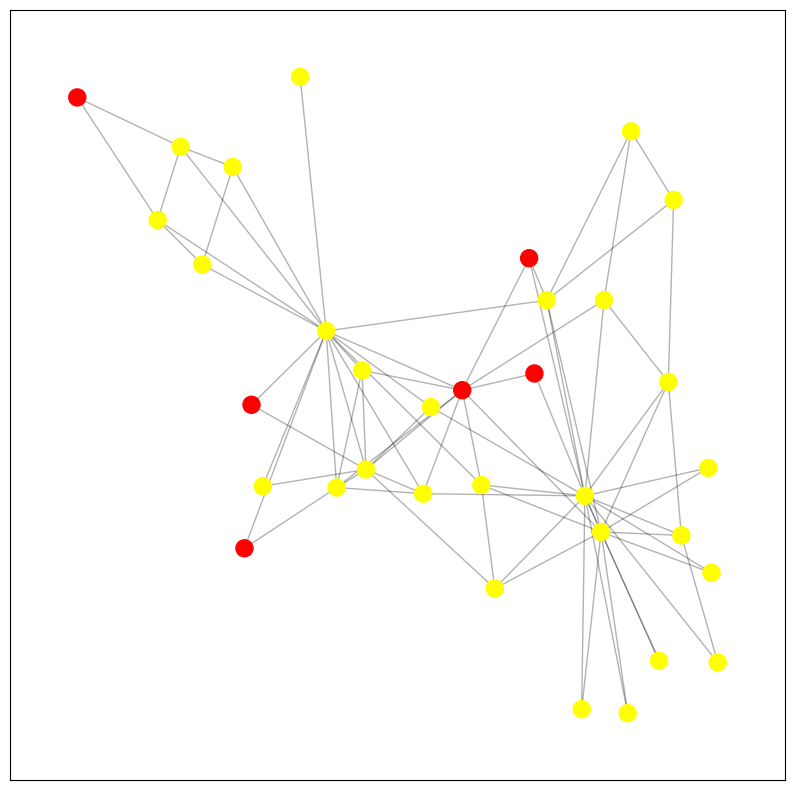

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[[3, 10, 13, 17, 18, 29], [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34]]


In [24]:
crtDir =  os.getcwd()
filePath = 'D:/FACULTATE/SEM4/AI/Lab10/real/karate/karate.gml'
G = nx.read_gml(filePath, label = 'id')
G = nx.Graph(G)

ga = GA(popSize=500, mutation_chance=0.05, geneSize=G.number_of_nodes(), killRate=0.8, graph=G, noCommunities=2)
ga.train(50)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Krebs</h1>

Epoch  1 / 50
Best score:  0.2789115646258503
Epoch  2 / 50
Best score:  0.31519274376417233
Epoch  3 / 50
Best score:  0.3287981859410431
Epoch  4 / 50
Best score:  0.31746031746031744
Epoch  5 / 50
Best score:  0.35147392290249435
Epoch  6 / 50
Best score:  0.3287981859410431
Epoch  7 / 50
Best score:  0.35827664399092973
Epoch  8 / 50
Best score:  0.35147392290249435
Epoch  9 / 50
Best score:  0.36054421768707484
Epoch  10 / 50
Best score:  0.36961451247165533
Epoch  11 / 50
Best score:  0.3786848072562358
Epoch  12 / 50
Best score:  0.3786848072562358
Epoch  13 / 50
Best score:  0.36281179138321995
Epoch  14 / 50
Best score:  0.3945578231292517
Epoch  15 / 50
Best score:  0.41950113378684806
Epoch  16 / 50
Best score:  0.42403628117913833
Epoch  17 / 50
Best score:  0.4308390022675737
Epoch  18 / 50
Best score:  0.4421768707482993
Epoch  19 / 50
Best score:  0.4376417233560091
Epoch  20 / 50
Best score:  0.4467120181405896
Epoch  21 / 50
Best score:  0.45351473922902497
Epoch  22 /

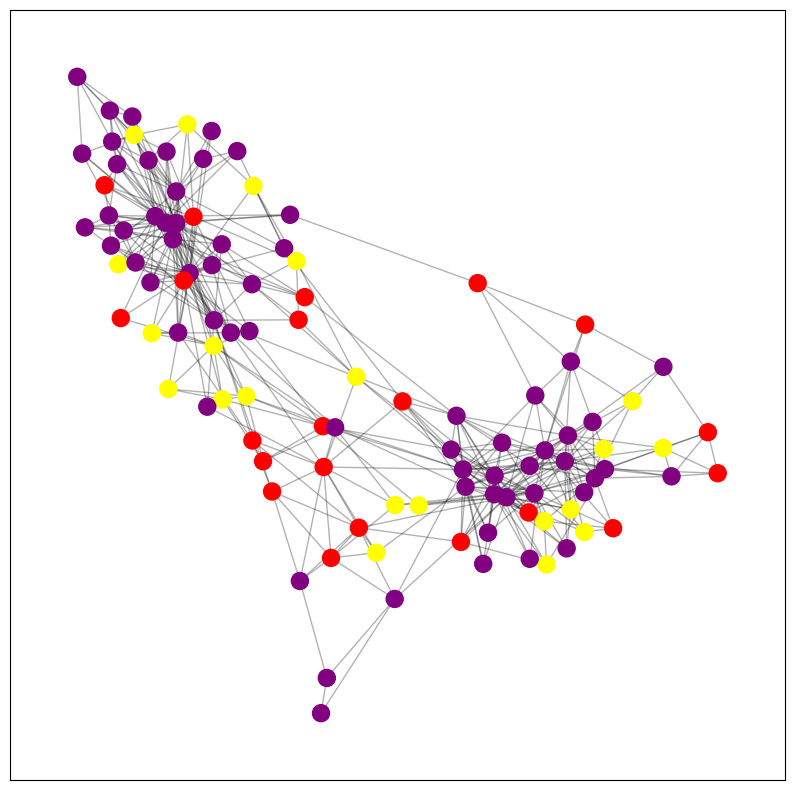

[2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1]
[[3, 5, 12, 14, 19, 33, 49, 52, 53, 54, 59, 60, 64, 65, 66, 71, 78, 80, 96, 99, 103], [4, 8, 9, 10, 11, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 51, 55, 56, 62, 63, 67, 68, 70, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 87, 89, 93, 94, 95, 97, 100, 101, 104, 105], [1, 2, 6, 7, 18, 26, 29, 36, 44, 50, 57, 58, 61, 69, 86, 88, 90, 91, 92, 98, 102]]


In [23]:
crtDir =  os.getcwd()
filePath = 'D:/FACULTATE/SEM4/AI/Lab10/real/krebs/krebs.gml'
G = nx.read_gml(filePath)
G = nx.Graph(G)

ga = GA(popSize=500, mutation_chance=0.05, geneSize=G.number_of_nodes(), killRate=0.8, graph=G, noCommunities=3)
ga.train(50)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Seturi de date identificate de student</h1>

<h3>1</h3>

Epoch  1 / 50
Best score:  0.16853932584269662
Epoch  2 / 50
Best score:  0.23595505617977527
Epoch  3 / 50
Best score:  0.2247191011235955
Epoch  4 / 50
Best score:  0.23595505617977527
Epoch  5 / 50
Best score:  0.3146067415730337
Epoch  6 / 50
Best score:  0.30337078651685395
Epoch  7 / 50
Best score:  0.33707865168539325
Epoch  8 / 50
Best score:  0.4044943820224719
Epoch  9 / 50
Best score:  0.43820224719101125
Epoch  10 / 50
Best score:  0.4943820224719101
Epoch  11 / 50
Best score:  0.47191011235955055
Epoch  12 / 50
Best score:  0.5842696629213483
Epoch  13 / 50
Best score:  0.6179775280898876
Epoch  14 / 50
Best score:  0.6179775280898876
Epoch  15 / 50
Best score:  0.6629213483146067
Epoch  16 / 50
Best score:  0.6966292134831461
Epoch  17 / 50
Best score:  0.7752808988764045
Epoch  18 / 50
Best score:  0.7752808988764045
Epoch  19 / 50
Best score:  0.7752808988764045
Epoch  20 / 50
Best score:  0.6404494382022472
Epoch  21 / 50
Best score:  0.6853932584269663
Epoch  22 / 50


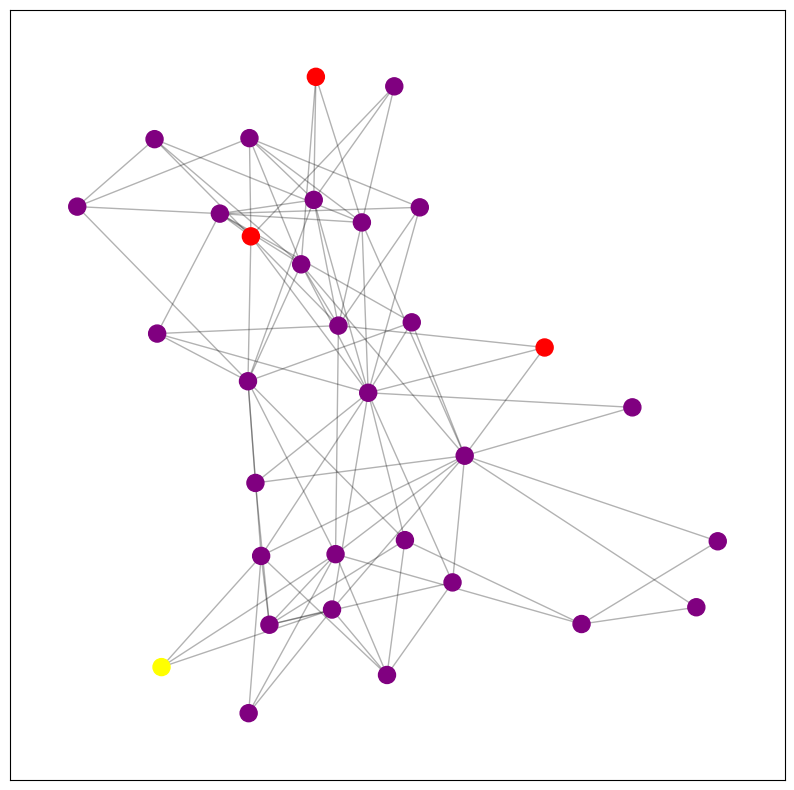

[[4, 8, 20], [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [32]]


In [25]:
G = nx.davis_southern_women_graph()  # Example graph
ga = GA(popSize=500,mutation_chance=0.01,geneSize=G.number_of_nodes(),killRate=0.6, graph=G, noCommunities = 3)
ga.train(50)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>2</h4>

Epoch  1 / 100
Best score:  0.1
Epoch  2 / 100
Best score:  0.2
Epoch  3 / 100
Best score:  0.2
Epoch  4 / 100
Best score:  0.35
Epoch  5 / 100
Best score:  0.45
Epoch  6 / 100
Best score:  0.55
Epoch  7 / 100
Best score:  0.65
Epoch  8 / 100
Best score:  0.7
Epoch  9 / 100
Best score:  0.8
Epoch  10 / 100
Best score:  0.8
Epoch  11 / 100
Best score:  0.85
Epoch  12 / 100
Best score:  0.8
Epoch  13 / 100
Best score:  0.8
Epoch  14 / 100
Best score:  0.7
Epoch  15 / 100
Best score:  0.7
Epoch  16 / 100
Best score:  0.65
Epoch  17 / 100
Best score:  0.7
Epoch  18 / 100
Best score:  0.7
Epoch  19 / 100
Best score:  0.7
Epoch  20 / 100
Best score:  0.55
Epoch  21 / 100
Best score:  0.7
Epoch  22 / 100
Best score:  0.8
Epoch  23 / 100
Best score:  0.7
Epoch  24 / 100
Best score:  0.7
Epoch  25 / 100
Best score:  0.8
Epoch  26 / 100
Best score:  0.85
Epoch  27 / 100
Best score:  0.7
Epoch  28 / 100
Best score:  0.7
Epoch  29 / 100
Best score:  0.65
Epoch  30 / 100
Best score:  0.8
Epoch  31 

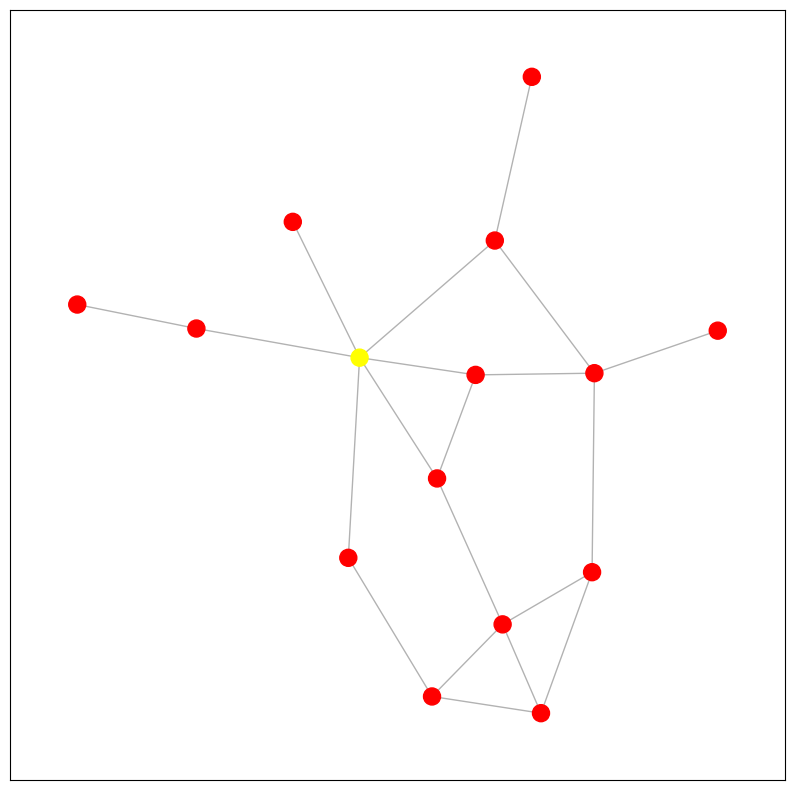

[[], [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [2]]


In [28]:
G = nx.florentine_families_graph() # Example graph
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>3</h4>

Epoch  1 / 20
Best score:  0.2440944881889764
Epoch  2 / 20
Best score:  0.2755905511811024
Epoch  3 / 20
Best score:  0.3188976377952756
Epoch  4 / 20
Best score:  0.35039370078740156
Epoch  5 / 20
Best score:  0.3858267716535433
Epoch  6 / 20
Best score:  0.4409448818897638
Epoch  7 / 20
Best score:  0.4881889763779528
Epoch  8 / 20
Best score:  0.5078740157480315
Epoch  9 / 20
Best score:  0.5551181102362205
Epoch  10 / 20
Best score:  0.6141732283464567
Epoch  11 / 20
Best score:  0.6338582677165354
Epoch  12 / 20
Best score:  0.6456692913385826
Epoch  13 / 20
Best score:  0.6535433070866141
Epoch  14 / 20
Best score:  0.6535433070866141
Epoch  15 / 20
Best score:  0.6692913385826772
Epoch  16 / 20
Best score:  0.6653543307086615
Epoch  17 / 20
Best score:  0.6771653543307087
Epoch  18 / 20
Best score:  0.6732283464566929
Epoch  19 / 20
Best score:  0.6771653543307087
Epoch  20 / 20
Best score:  0.7047244094488189


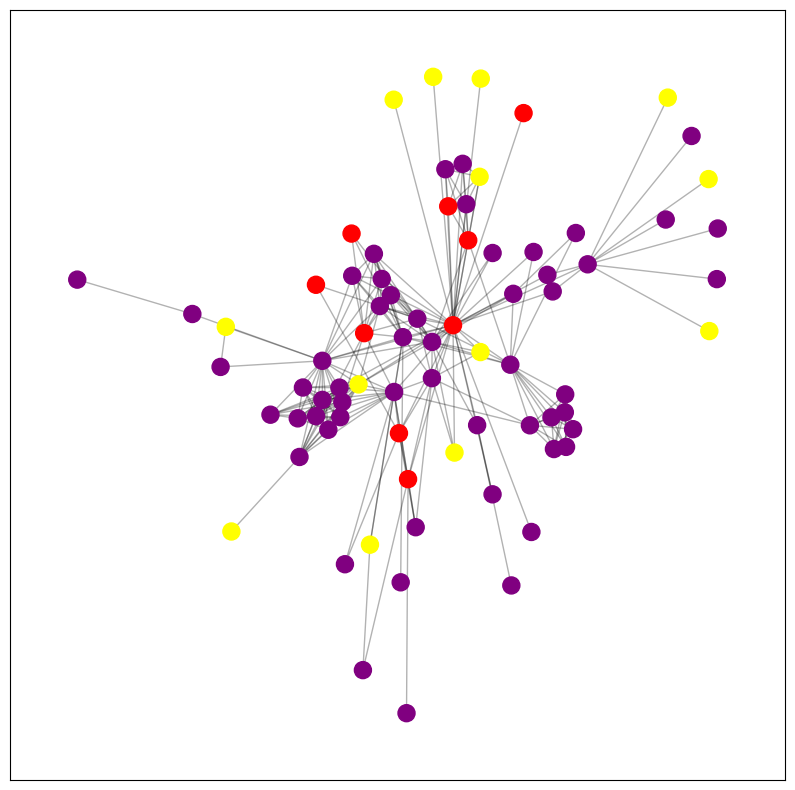

[[11, 16, 30, 36, 42, 43, 50, 51, 52], [1, 2, 3, 4, 6, 9, 10, 12, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 37, 38, 41, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 75, 76, 77], [5, 7, 8, 14, 15, 33, 39, 40, 44, 59, 68, 73, 74]]


In [27]:
G = nx.les_miserables_graph()# Example graph
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>4</h4>

In [ ]:
G = nx.karate_club_graph()
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>5</h4>

In [ ]:
G = nx.petersen_graph()
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>6</h4>

In [ ]:
G = nx.tutte_graph()
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))